In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
from matplotlib import pyplot as plt

from yellowbrick.classifier import ClassificationReport, ROCAUC

In [2]:
bnk_data=pd.read_csv('F:\\UTA-ML\\Ensemble Techquines - Project\\bank-full.csv')

In [3]:
bnk_data.shape

(45211, 17)

In [4]:
bnk_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bnk_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

###no feature found with missing values

In [6]:
bnk_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### no feature found with NA or NULL values

In [7]:
bnk_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
bnk_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
col=bnk_data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

### Value Counts for all the Columns

In [10]:
for i in col:
    print('value counts for ' + i)
    print(bnk_data[i].value_counts().sort_index())

value counts for age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64
value counts for job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
value counts for marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
value counts for education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
value counts for default
no     44396
yes      815
Name: default, dtype: int64
value counts for balance
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: i

In [11]:
bnk_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


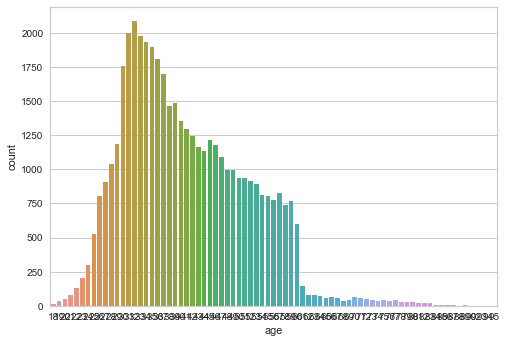

In [12]:
sns.countplot(bnk_data['age'])

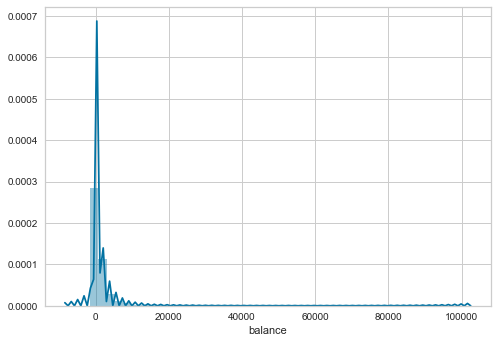

In [13]:
sns.distplot(bnk_data['balance'], kde=True)

In [14]:
bnk_data[['Target','job']].groupby(['job','Target']).size()

job            Target
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
dtype: int64

In [15]:
pd.set_option("display.max_rows", 62)
bnk_data[['Target','day']].groupby(['day','Target']).size()

day  Target
1    no         232
     yes         90
2    no        1111
     yes        182
3    no         901
     yes        178
4    no        1215
     yes        230
5    no        1695
     yes        215
6    no        1751
     yes        181
7    no        1660
     yes        157
8    no        1641
     yes        201
9    no        1382
     yes        179
10   no         403
     yes        121
11   no        1298
     yes        181
12   no        1359
     yes        244
13   no        1344
     yes        241
14   no        1638
     yes        210
15   no        1465
     yes        238
16   no        1223
     yes        192
17   no        1763
     yes        176
18   no        2080
     yes        228
19   no        1635
     yes        122
20   no        2560
     yes        192
21   no        1825
     yes        201
22   no         751
     yes        154
23   no         813
     yes        126
24   no         385
     yes         62
25   no         707
     yes

In [16]:
bnk_data[['Target','month']].groupby(['month','Target']).size()

month  Target
apr    no         2355
       yes         577
aug    no         5559
       yes         688
dec    no          114
       yes         100
feb    no         2208
       yes         441
jan    no         1261
       yes         142
jul    no         6268
       yes         627
jun    no         4795
       yes         546
mar    no          229
       yes         248
may    no        12841
       yes         925
nov    no         3567
       yes         403
oct    no          415
       yes         323
sep    no          310
       yes         269
dtype: int64

In [17]:
pd.set_option("display.max_rows", 10)
bnk_data[['Target','duration']].groupby(['duration','Target']).size()

duration  Target
0         no         3
1         no         2
2         no         3
3         no         4
4         no        15
                    ..
3366      no         1
3422      no         1
3785      no         1
3881      yes        1
4918      no         1
Length: 2627, dtype: int64

In [18]:
bnk_data[['Target','poutcome']].groupby(['poutcome','Target']).size()

poutcome  Target
failure   no         4283
          yes         618
other     no         1533
          yes         307
success   no          533
          yes         978
unknown   no        33573
          yes        3386
dtype: int64

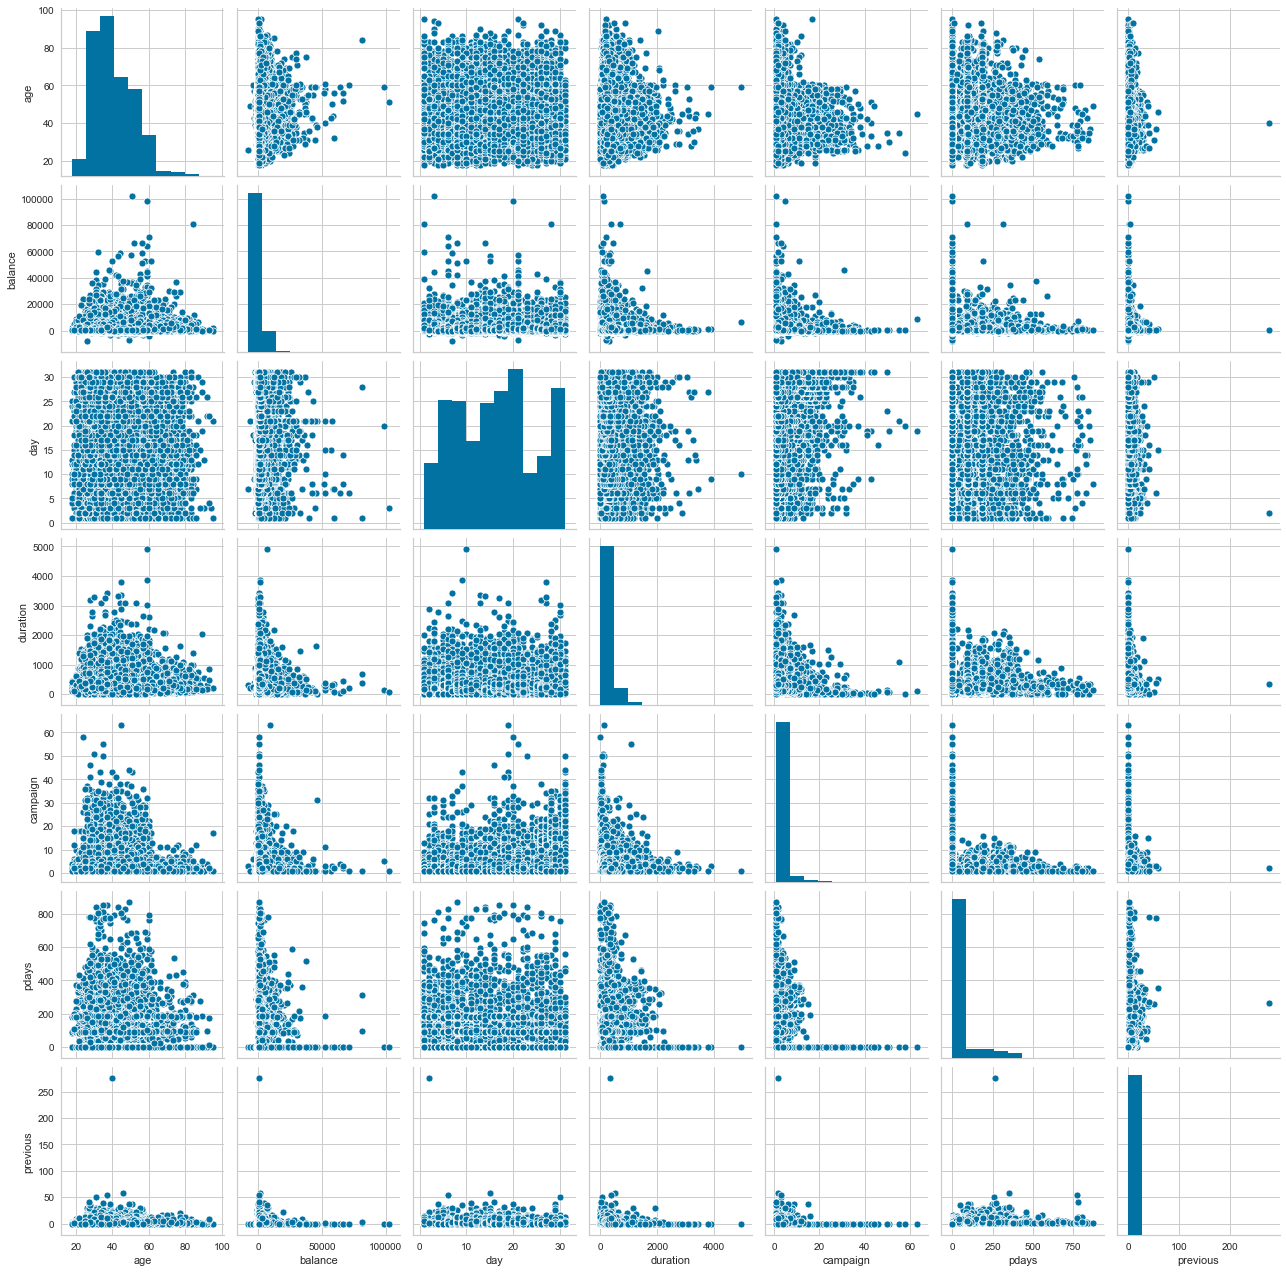

In [19]:
sns.pairplot(bnk_data);
plt.show()

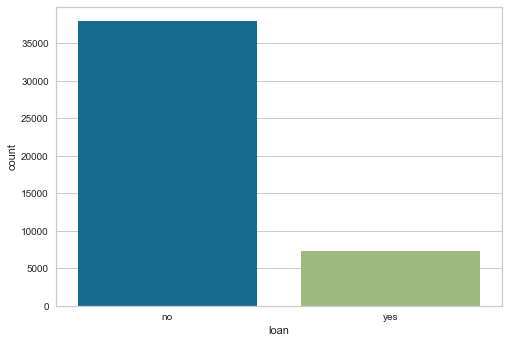

In [20]:
sns.countplot(bnk_data['loan'])

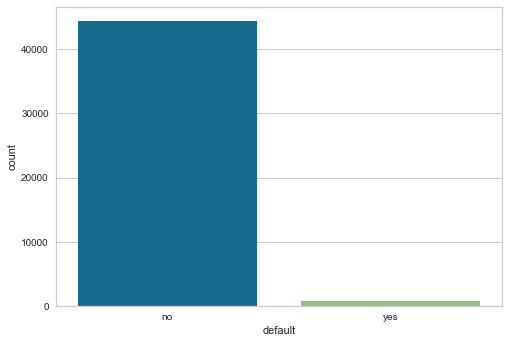

In [21]:
sns.countplot(bnk_data['default'])

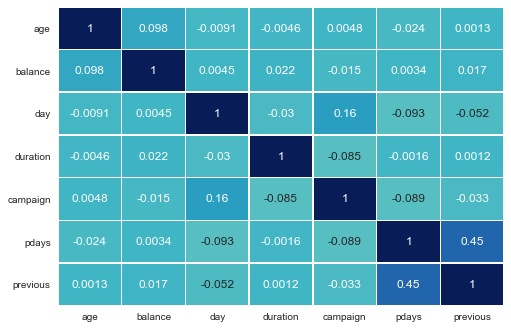

In [22]:
sns.heatmap(bnk_data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

### Below Features have Distinct Countable values so converting them into Categrocial and assigning Numeric values for
##### job
         unknown      -0  
         admin        -1
         blue-collar  -2      
         entrepreneur -3     
         housemaid    -4 
         management   -5  
         retired      -6
         self-employed-7    
         services     -8
         student      -9
         technician   -10
         unemployed   -11
         
##### Marital
        single      1
        married     2
        divorced    3
    
##### Education
        unknown      0
        primary      1
        secondary    2
        tertiary     3
        
##### default	
        no      0
        yes     1
##### housing	  
        no      0
        yes     1
##### loan
        no      0
        yes     1
##### poutcome
    unknown     0
    failure     1
    success     2    
    other       3



In [23]:
bnk_data['job'] = bnk_data['job'].replace({'unknown': 0,
         'admin.'        :1,
         'blue-collar'  :2 ,     
         'entrepreneur' :3,   
         'housemaid'    :4, 
         'management'   :5,
         'retired'      :6,
         'self-employed':7,    
         'services'     :8,
         'student'      :9,
         'technician'   :10,
         'unemployed'   :11})  

bnk_data['marital'] = bnk_data['marital'].replace({'single':1,'married':2,'divorced':3})

bnk_data['education'] = bnk_data['education'].replace({'unknown': 0,'primary'  :1,  'secondary'  :2 , 'tertiary' :3})

bnk_data['default'] = bnk_data['default'].replace({'no': 0,'yes':1})

bnk_data['loan'] = bnk_data['loan'].replace({'no': 0,'yes':1})

bnk_data['housing'] = bnk_data['housing'].replace({'no': 0,'yes':1})

bnk_data['poutcome'] = bnk_data['poutcome'].replace({  'unknown':0,'failure':1,'success': 2,'other':3})

bnk_data['Target'] = bnk_data['Target'].replace({'no': 0,'yes':1})


In [24]:

bnk_data['job']=bnk_data['job'].astype('category')
bnk_data['marital']=bnk_data['marital'].astype('category')
bnk_data['education']=bnk_data['education'].astype('category')
bnk_data['default']=bnk_data['default'].astype('category')
bnk_data['housing']=bnk_data['housing'].astype('category')
bnk_data['loan']=bnk_data['loan'].astype('category')
bnk_data['poutcome']=bnk_data['poutcome'].astype('category')
#bnk_data['Target']=bnk_data['Target'].astype('category')

In [25]:
bnk_data['Target']=bnk_data['Target'].astype('int64')

##### Age has  distinct values from 18-95. 77 Distinct values. with respecitive to Age, this data little right skewed.
##### Job has 12 unique categories This column can be coverted into Categorical
##### Marital has 3 unique categories This column can be coverted into Categorical 
##### Education has 4 unique categories This column can be coverted into Categorical.
##### Default has 2 unique categories This column can be coverted into Categorical.
##### Balance is a continuous variable. Mean is more than the Median so this data right skewed.  There are outliers in data.
##### Housing has 2 unique categories This column can be coverted into Categorical.
##### Loan has 2 unique categories This column can be coverted into Categorical.
##### Contact has 3 unique categories. 35% of records have 'unknown' as contact method. Considering huge volume of unknown and mode of contact might not impact the Target, this column will be dropped.
#####  Day has 31 unique categories and Month has 12 Unique values. Considering these two columns wont impact the Target, this column will be dropped.
#####  Duration is a continuos variable. The more time the customer interested to listen to campain the more chances for the custormer to subscribe the Term Deposit. Considering this feature in modeling.
#####  Considering Campaign as Continuos Variable
#####  pdays is the number of days that passed by after the client was last contacted. Dropping this feature.
#####  previous - considering this feature as continuous variable.
#####  poutcome - has 4 unique categories This column can be coverted into Categorical.

### Linear Regression Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [27]:
bnk_data_lr=bnk_data.drop(columns=['contact','day','month', 'pdays'])

In [28]:
bnk_data_lr.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,Target
0,58,5,2,3,0,2143,1,0,261,1,0,0,0
1,44,10,1,2,0,29,1,0,151,1,0,0,0
2,33,3,2,2,0,2,1,1,76,1,0,0,0
3,47,2,2,0,0,1506,1,0,92,1,0,0,0
4,33,0,1,0,0,1,0,0,198,1,0,0,0


In [29]:
bnk_data_lr.dtypes

age             int64
job          category
marital      category
education    category
default      category
               ...   
duration        int64
campaign        int64
previous        int64
poutcome     category
Target          int64
Length: 13, dtype: object

##### hot encoding for the Categorical Variables

In [30]:
bnk_data_lr=pd.get_dummies(bnk_data_lr,drop_first=True )

In [31]:
bnk_data_lr.head(5)

,age,balance,duration,campaign,previous,Target,job_1,job_2,job_3,job_4,...,marital_3,education_1,education_2,education_3,default_1,housing_1,loan_1,poutcome_1,poutcome_2,poutcome_3
0,58,2143,261,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,44,29,151,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,33,2,76,1,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,47,1506,92,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,1,198,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X = bnk_data_lr.drop(['Target'], axis=1)

y = bnk_data_lr['Target']

Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(X, y, test_size=0.30, random_state=9)

In [33]:
regression_model = LinearRegression()
regression_model.fit(Xlr_train, ylr_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
regression_model.score(Xlr_train, ylr_train)

0.2704924297836493

In [35]:
regression_model.score(Xlr_test, ylr_test)

0.2644633116692744

In [36]:
acc_LR = regression_model.score(Xlr_test, ylr_test)

resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': acc_LR})

resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Linear Regression,0.264463


##### Liner Regression Score for both Training and Testing data is very low
- by changing all the columns into Categorical the score is 26 else the score is 21 

#### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [38]:
bnk_data.groupby('job').describe().T.loc['Target']

job,0,1,2,3,4,5,6,7,8,9,10,11
count,288.000000,5171.000000,9732.000000,1487.000000,1240.000000,9458.000000,2264.000000,1579.000000,4154.000000,938.000000,7597.00000,1303.000000
mean,0.118056,0.122027,0.072750,0.082717,0.087903,0.137556,0.227915,0.118429,0.088830,0.286780,0.11057,0.155027
std,0.323236,0.327348,0.259739,0.275546,0.283268,0.344451,0.419580,0.323218,0.284533,0.452499,0.31362,0.362069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [39]:
bnk_data_dt1=bnk_data.drop(columns=['contact','day','month', 'pdays'])
X_train, X_test, y_train, y_test =train_test_split(bnk_data_dt1.drop('Target',axis=1), bnk_data_dt1['Target'], test_size=.30,
                                                   random_state=9)
X_train.shape,X_test.shape

((31647, 12), (13564, 12))

In [40]:
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
model_entropy.score(X_train, y_train) 

1.0

In [42]:
model_entropy.score(X_test, y_test)

0.8556473016809201

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,model_entropy.predict(X_test))

array([[10990,   974],
       [  984,   616]], dtype=int64)

In [45]:
print(classification_report(y_test,model_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11964
           1       0.39      0.39      0.39      1600

    accuracy                           0.86     13564
   macro avg       0.65      0.65      0.65     13564
weighted avg       0.86      0.86      0.86     13564



In [46]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 9,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

In [47]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

acc_DT = accuracy_score(y_test, preds_pruned)
acc_DT

0.8949424948392805
0.8957247132429614


0.8949424948392805

In [48]:
## Calculating feature importance

feature_cols = X_test.columns
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.682831
poutcome,0.317169
age,0.000000
job,0.000000
marital,0.000000
...,...
balance,0.000000
housing,0.000000
loan,0.000000
campaign,0.000000


In [49]:
print(classification_report(y_test,clf_pruned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11964
           1       0.58      0.38      0.46      1600

    accuracy                           0.89     13564
   macro avg       0.75      0.67      0.70     13564
weighted avg       0.88      0.89      0.89     13564



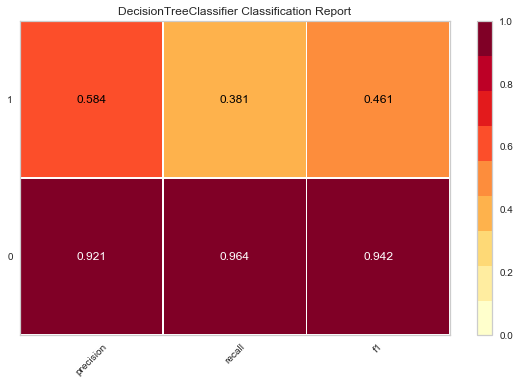

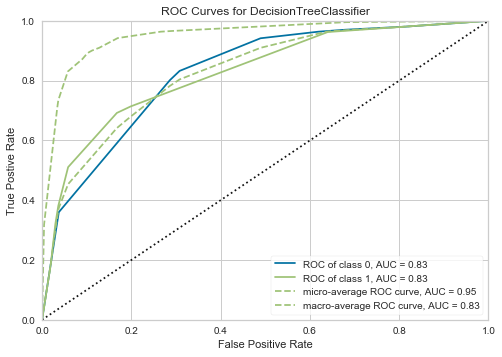

In [50]:
# Visualize model performance with yellowbrick library

clf_pruned = ClassificationReport( DecisionTreeClassifier(criterion = "entropy", random_state = 9,
                               max_depth=3, min_samples_leaf=5))
clf_pruned.fit(X_train, y_train)
clf_pruned.score(X_test, y_test)
clf_pruned.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=3))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [51]:

tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Linear Regression,0.264463
0,Decision Tree,0.894942


### Random Forrest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,max_depth=3)
rfcl = rfcl.fit(X_train, y_train)

In [53]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [54]:
acc_train = accuracy_score(y_train,rfcl.predict(X_train))
acc_test = accuracy_score(y_test,rfcl.predict(X_test))
(acc_train,acc_test)

(0.8843492274149208, 0.8827779416101444)

In [55]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Pruned'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Linear Regression,0.264463
0,Decision Tree,0.894942
0,Random Forest Pruned,0.882778


In [56]:
confusion_matrix(y_test,rfcl.predict(X_test))

array([[11961,     3],
       [ 1587,    13]], dtype=int64)

In [57]:
print(classification_report(y_test,rfcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11964
           1       0.81      0.01      0.02      1600

    accuracy                           0.88     13564
   macro avg       0.85      0.50      0.48     13564
weighted avg       0.87      0.88      0.83     13564



### BAGGING 

In [58]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                         n_estimators=50, 
                         max_samples= 0.7, 
                         bootstrap=True, 
                         oob_score=True, 
                         random_state=9)
bgcl = bgcl.fit(X_train, y_train)

In [59]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [60]:
acc_train = accuracy_score(y_train,bgcl.predict(X_train))
acc_test = accuracy_score(y_test,bgcl.predict(X_test))
(acc_train,acc_test)

(0.8986001832717161, 0.8965644352698319)

In [61]:
tempResultsDf = pd.DataFrame({'Method':['Bagging DT pruned'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Linear Regression,0.264463
0,Decision Tree,0.894942
0,Random Forest Pruned,0.882778
0,Bagging DT pruned,0.896564


In [62]:
confusion_matrix(y_test,rfcl.predict(X_test))

array([[11961,     3],
       [ 1587,    13]], dtype=int64)

In [63]:
print(classification_report(y_test,rfcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11964
           1       0.81      0.01      0.02      1600

    accuracy                           0.88     13564
   macro avg       0.85      0.50      0.48     13564
weighted avg       0.87      0.88      0.83     13564



### GradientBoost 

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(max_depth=1,n_estimators = 50, learning_rate = 0.1, random_state=9)
gbcl = gbcl.fit(X_train, y_train)

In [65]:
acc_train = accuracy_score(y_train,gbcl.predict(X_train))
acc_test = accuracy_score(y_test,gbcl.predict(X_test))
(acc_train,acc_test)

(0.8904793503333649, 0.8890445296372751)

In [66]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [67]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost -1'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Linear Regression,0.264463
0,Decision Tree,0.894942
0,Random Forest Pruned,0.882778
0,Bagging DT pruned,0.896564
0,Gradient Boost -1,0.889045


In [68]:
confusion_matrix(y_test,rfcl.predict(X_test))

array([[11961,     3],
       [ 1587,    13]], dtype=int64)

In [69]:
print(classification_report(y_test,rfcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11964
           1       0.81      0.01      0.02      1600

    accuracy                           0.88     13564
   macro avg       0.85      0.50      0.48     13564
weighted avg       0.87      0.88      0.83     13564



### ADA BOOST

In [70]:
from sklearn.ensemble import AdaBoostClassifier


from sklearn.linear_model import LogisticRegression
#base_estimator=LogisticRegression()
abcl = AdaBoostClassifier(base_estimator=LogisticRegression(),
                          n_estimators = 100, learning_rate=0.1, random_state=9)
abcl = abcl.fit(X_train, y_train)

In [71]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
acc_AB

0.8854320259510469

In [72]:
confusion_matrix(y_test,rfcl.predict(X_test))

array([[11961,     3],
       [ 1587,    13]], dtype=int64)

In [73]:
print(classification_report(y_test,rfcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11964
           1       0.81      0.01      0.02      1600

    accuracy                           0.88     13564
   macro avg       0.85      0.50      0.48     13564
weighted avg       0.87      0.88      0.83     13564



In [74]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost LR'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Linear Regression,0.264463
0,Decision Tree,0.894942
0,Random Forest Pruned,0.882778
0,Bagging DT pruned,0.896564
0,Gradient Boost -1,0.889045
0,Adaboost LR,0.885432
